In [1]:
import pandas as pd
import os

In [2]:
topic = 'abortion_mohammad'
scheme = ''

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_mohammad_train.csv'
test_file = f'{path}/test/labeled_mohammad_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/abortion_mohammad/'

In [3]:
train = pd.read_csv(train_file,encoding = "ISO-8859-1")

In [4]:
train.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


In [5]:
train.Target.unique()

array(['Hillary Clinton', 'Legalization of Abortion', 'Atheism',
       'Climate Change is a Real Concern', 'Feminist Movement'],
      dtype=object)

In [6]:
train = train.query("Target == 'Legalization of Abortion' & Stance in ('FAVOR', 'AGAINST')")

In [7]:
train = train[['Stance', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [8]:
train.head()

,Label,Tweet
50,AGAINST,Just laid down the law on abortion in my bioet...
51,FAVOR,@tooprettyclub Are you OK with #GOP males tell...
52,AGAINST,"If you don't want your kid, put it up for adop..."
53,AGAINST,"@RedAlert -there should be a ""stigma"" to butch..."
55,AGAINST,Life is our first and most basic human right.


In [9]:
train.Label.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [10]:
train['Label']=train.Label.apply(lambda x: 1 if x=='FAVOR' else -1)

In [11]:
#train = train.query('Label != 0')
train.Label.unique()

array([-1,  1])

In [12]:
train.groupby('Label').count()

,Tweet
Label,
-1,355
1,121


In [13]:
test = pd.read_csv(test_file, encoding = "ISO-8859-1")
test.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [14]:
test = test.query("Target == 'Legalization of Abortion' & Stance in ('FAVOR', 'AGAINST')")
test

,Tweet,Target,Stance,Opinion Towards,Sentiment
969,Need a ProLife R.E. Agent? - Support a ProLife...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,pos
970,Where is the childcare program @joanburton whi...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
971,I get several requests with petitions to save ...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
972,"we must always see others as Christ sees us,we...",Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,pos
973,PRAYERS FOR BABIES Urgent prayer one in Lexing...,Legalization of Abortion,AGAINST,2. The tweet does NOT expresses opinion about ...,pos
...,...,...,...,...,...
1243,"@cbrangel so, you support the choice of wether...",Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1245,"For he who avenges blood remembers, he does no...",Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,other
1246,Life is sacred on all levels. Abortion does no...,Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,other
1247,"@ravensymone U refer to ""WE"" which =""YOU"" & a ...",Legalization of Abortion,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


In [15]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [16]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1})
test = test.query('Stance != 0')
test.Stance.unique()

<ipython-input-16-d8caf9faf00f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1})


array([-1,  1])

In [17]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,189
1,46


In [18]:
train.shape, test.shape

((476, 2), (235, 2))

# clean data

In [19]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
#sys.path.insert(0, '/ENES/Stance')
import cleandata as cd

In [20]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USERS')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USERS')

In [21]:
train = train.dropna(axis=0)

# save data

In [24]:
train.to_csv(f'{clean_path}/train/clean_{topic}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_test.csv', index=False)

# read data

In [25]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_test.csv')

In [26]:
train['Label'].value_counts(), test['Label'].value_counts()

(-1    355
  1    121
 Name: Label, dtype: int64,
 -1    189
  1     46
 Name: Label, dtype: int64)

<AxesSubplot:ylabel='Label'>

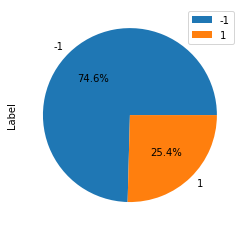

In [27]:
train['Label'].value_counts().plot(kind='pie', legend=True, autopct='%1.1f%%')

<AxesSubplot:ylabel='Label'>

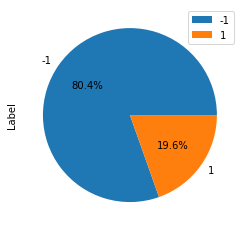

In [28]:
test['Label'].value_counts().plot.pie(legend=True, autopct='%1.1f%%')

<AxesSubplot:>

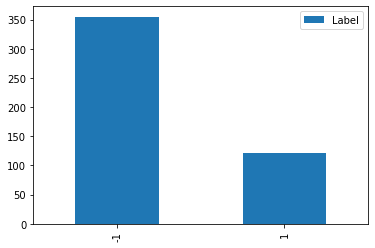

In [29]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

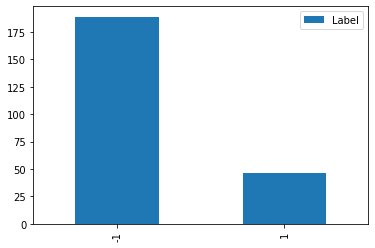

In [30]:
test['Label'].value_counts().plot.bar(legend=True)

In [31]:
train

,Label,Tweet
0,-1,Just laid down the law on abortion in my bioet...
1,1,USERS Are you OK with #GOP males telling you w...
2,-1,"If you don't want your kid, put it up for adop..."
3,-1,"USERS -there should be a ""stigma"" to butcherin..."
4,-1,Life is our first and most basic human right.
...,...,...
471,-1,"There's a law protecting unborn eagles, but no..."
472,-1,I am 1 in 3... I have had an abortion
473,-1,How dare you say my sexual preference is a cho...
474,-1,"Equal rights for those 'born that way', no rig..."


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   476 non-null    int64 
 1   Tweet   476 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   235 non-null    int64 
 1   Tweet   235 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [34]:
train = train.dropna(axis=0)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   476 non-null    int64 
 1   Tweet   476 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


# Training

In [36]:
from fastai.text import *

In [37]:
NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/abortion_mohammad/'

In [38]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.1)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [39]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,- born children - its a xxunk crime against xxunk . xxbos xxmaj life is our first and most xxunk human right . xxbos xxmaj xxunk & xxmaj xxunk its a new day & you 're alive . xxmaj thank xxmaj god 4 another day of precious life . xxbos xxmaj xxunk my xxunk xxunk xxunk women the right to an abortion is against xxunk . xxmaj they do n't
1,"& reproductive rights xxrep 4 . xxbos we xxunk xxunk that love means to be xxunk to give until it hurts - xxmaj mother xxmaj teresa xxbos xxmaj life , what a xxunk choice . xxmaj adoption . xxmaj not abortion . xxbos xxmaj my xxunk today xxunk said that xxunk 's are nothing but xxunk + blood & that abortion was fine . xxbos xxup users xxmaj keeping pregnant"
2,xxunk up to the person carrying that pregnancy ... xxbos i will agree to gay marriage if you agree to pro - life and then xxunk babies that would have been aborted . xxbos i xxunk # xxunk and it gave me a whole new xxunk on a woman 's right to choose . xxbos xxup users i do n't xxunk . xxmaj why would you want to make people
3,"do n't care about you having sex , but when you 're pregnant , there 's another life xxunk . xxbos xxmaj today i am grateful to have the right to control my body without govt xxunk . # antichoice xxunk want to stop this . xxbos xxmaj xxunk , most health xxunk xxunk do n't xxunk abortions , so the xxunk can be xxunk xxunk xxrep 4 . xxbos"
4,"was born 4 months premature ... i 'm xxunk fine , xxunk killing babies is legal in this country . xxbos xxmaj you ca n't kill someone xxunk you xxunk you made a xxunk . xxmaj if true xxunk would go to xxunk for killing their xxunk . xxbos i love how # xxunk only xxunk # xxunk of xxunk on women when we do n't want to xxunk xxbos"


In [40]:
data_lm.save('data_lm')

In [41]:
data_lm.train_ds.vocab.itos[:5], len(data_lm.train_ds.vocab.itos)

(['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld'], 424)

In [42]:
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-01
Min loss divided by 10: 1.10E-01


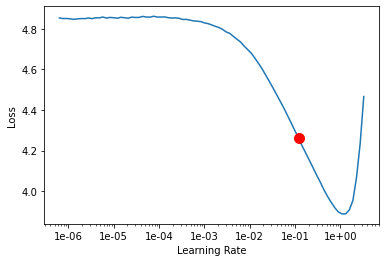

In [43]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [44]:
learn_lm.fit_one_cycle(10, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.684975,4.072584,0.242411,00:00
1,4.321920,3.534479,0.250893,00:00
2,3.935550,3.367902,0.285268,00:00
3,3.631002,3.302084,0.312277,00:00
4,3.395230,3.311852,0.313616,00:00
5,3.190722,3.399304,0.312723,00:00
6,3.019031,3.391279,0.304464,00:00
7,2.868964,3.367262,0.320759,00:00
8,2.743036,3.379910,0.323661,00:00
9,2.639212,3.383467,0.325446,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-03
Min loss divided by 10: 8.32E-03


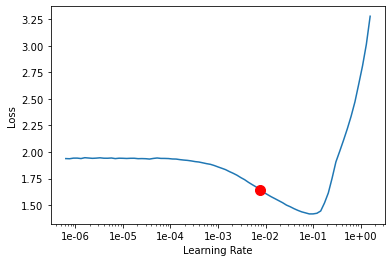

In [45]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [46]:
learn_lm.fit_one_cycle(4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.956794,3.407362,0.309375,00:01
1,1.920870,3.423355,0.318080,00:01
2,1.870390,3.451773,0.324330,00:01
3,1.834317,3.456091,0.317857,00:01


In [47]:
learn_lm.save('data_lm_tuned')
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [49]:
data_clas = TextClasDataBunch.from_df(NN_path, 
                                      train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=16)

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [50]:
data_clas.show_batch()

text,target
xxbos # xxup xxunk xxunk his xxunk w / 1 / 2 xxunk xxunk . xxmaj the # xxup xxunk xxunk ? xxup still ! ! xxmaj xxunk # xxmaj xxunk laws & # xxmaj xxunk xxmaj xxunk xxmaj access 2,-1
xxbos xxup xxunk xxup xxunk xxmaj xxunk xxunk on xxup xxunk xxmaj xxunk - xxmaj xxunk xxmaj unborn xxmaj child xxmaj xxunk xxmaj xxunk could xxunk as xxunk as xxmaj we xxunk . xxmaj xxunk your xxunk !,-1
xxbos xxmaj dear # xxunk . xxup stop . xxmaj just xxup xxunk xxup stop . xxmaj you have choices . xxmaj it 's xxunk # abortion . xxmaj take it or xxunk it but xxunk xxunk .,1
xxbos xxup xxunk : xxmaj xxunk 's a xxmaj xxunk xxmaj penalty . xxmaj so we pay xxunk to have kids & we pay xxunk to kill premature babies . xxup xxunk 's xxunk here xxunk ?,-1
"xxbos xxup how xxup could i xxup die xxup before xxup even i xxup born , xxup to xxup you i xxup am xxup just xxup xxunk xxup little xxup thing xxup that xxup xxunk xxup matter",-1


In [51]:
data_clas.save('data_class')

In [52]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=.5)

In [53]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): 
    return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [54]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [55]:
learn.save('learner-init')

In [56]:
learn.load('learner-init');

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-03
Min loss divided by 10: 3.02E-02


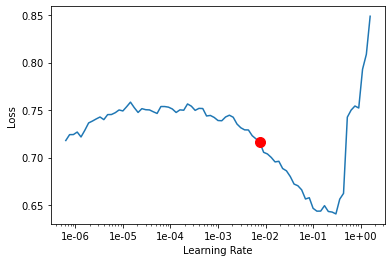

In [57]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [58]:
learn.fit_one_cycle(10, 1e-2,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.675881,0.600714,0.620271,00:01
1,0.634278,0.580347,0.542061,00:01
2,0.549438,0.680653,0.596315,00:01
3,0.500402,0.481984,0.623778,00:01
4,0.460032,0.559239,0.632221,00:01
5,0.442347,0.544130,0.571315,00:01
6,0.385782,0.556439,0.569630,00:01
7,0.350623,0.538796,0.607318,00:01
8,0.341258,0.536800,0.605761,00:01
9,0.318822,0.553064,0.601493,00:01


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [59]:
learn.save('learner-2stage')

In [60]:
learn.load('learner-2stage');

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-07


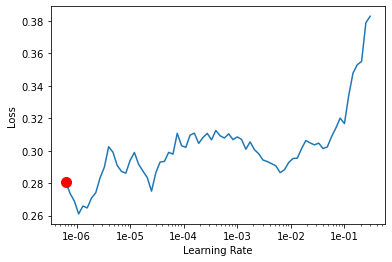

In [61]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [62]:
learn.fit_one_cycle(5,1e-7,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.306781,0.525267,0.602030,00:01
1,0.305433,0.536290,0.604916,00:01
2,0.298596,0.543545,0.623328,00:01
3,0.292823,0.523045,0.588067,00:01
4,0.295194,0.549595,0.614181,00:01


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [63]:
learn.save('learner-3stage')

In [64]:
learn.load('learner-3stage');

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-05
Min loss divided by 10: 3.31E-05


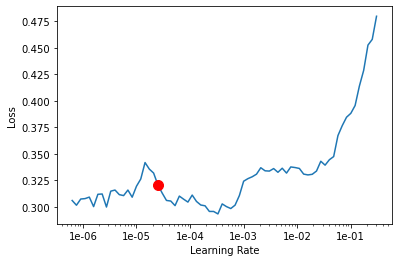

In [65]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [66]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.302552,0.549216,0.585659,00:01
1,0.296162,0.540537,0.562941,00:01
2,0.280817,0.560267,0.576201,00:01
3,0.287589,0.553996,0.542242,00:01
4,0.277920,0.551618,0.557810,00:01


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.32E-07


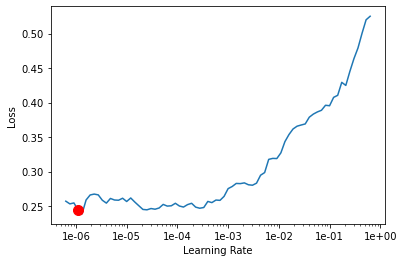

In [67]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [68]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.277985,0.535719,0.570167,00:02
1,0.285762,0.588692,0.549356,00:02
2,0.302299,0.605830,0.557250,00:02
3,0.286560,0.556015,0.579529,00:02
4,0.268662,0.577486,0.571296,00:02


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-08


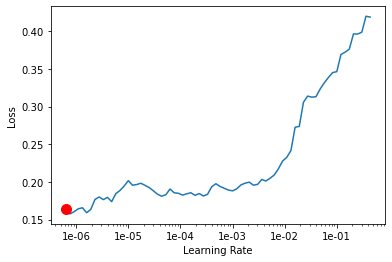

In [69]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [70]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.229532,0.599241,0.554134,00:02
1,0.213037,0.553884,0.577769,00:02
2,0.207567,0.636580,0.600066,00:02
3,0.192952,0.642268,0.614001,00:02
4,0.176564,0.688633,0.584386,00:02


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


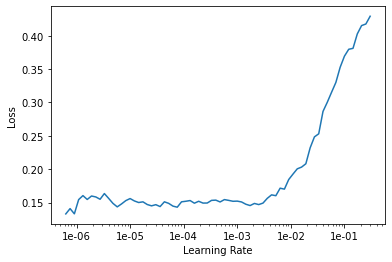

In [71]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [72]:
learn.fit_one_cycle(3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.174174,0.639435,0.608630,00:03
1,0.160988,0.681309,0.588034,00:03
2,0.123673,0.611582,0.593044,00:03


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [73]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

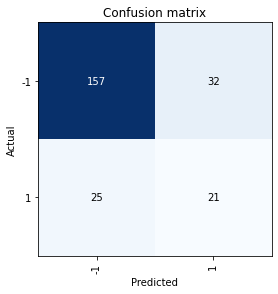

In [74]:
interp.plot_confusion_matrix()

In [77]:
preds

tensor([[9.7874e-01, 2.1261e-02],
        [7.8892e-01, 2.1108e-01],
        [9.7608e-01, 2.3918e-02],
        [9.9998e-01, 1.6921e-05],
        [9.9590e-01, 4.0950e-03],
        [7.7232e-01, 2.2768e-01],
        [8.8894e-01, 1.1106e-01],
        [9.9951e-01, 4.8684e-04],
        [9.9811e-01, 1.8878e-03],
        [3.6535e-01, 6.3465e-01],
        [9.7828e-01, 2.1722e-02],
        [8.9201e-01, 1.0799e-01],
        [9.9622e-01, 3.7790e-03],
        [9.8634e-01, 1.3656e-02],
        [6.2472e-01, 3.7528e-01],
        [9.9979e-01, 2.0787e-04],
        [9.9978e-01, 2.2403e-04],
        [9.9700e-01, 2.9979e-03],
        [7.7994e-01, 2.2006e-01],
        [9.2139e-01, 7.8608e-02],
        [9.7522e-01, 2.4782e-02],
        [6.5477e-01, 3.4523e-01],
        [9.8859e-01, 1.1413e-02],
        [6.5135e-02, 9.3486e-01],
        [9.0596e-01, 9.4044e-02],
        [5.3009e-01, 4.6991e-01],
        [9.4389e-01, 5.6108e-02],
        [3.4533e-01, 6.5467e-01],
        [9.7567e-01, 2.4329e-02],
        [9.996